In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from ipynb.fs.full.Generate_disk import *
#The Generate_disk file wich was given. It must be stored in the same folder, or you have to specify the path

## 1.1 1D quadrature

In [2]:
def quadrature1D(a, b, N_q, g):
    """
    Integrates the function g, from a to b with gaussian quadrature.
    """
    
    #Modification for 3.3 Gauss quadrature
    if(type(a) == type(np.array([]))):
        
        line = lambda t: a + (b-a)*t
        
        integrand = lambda t: np.linalg.norm(b-a) * g(line(t)[0], line(t)[1])
                
        return(quadrature1D(0, 1, N_q, integrand))
    
    #Setting integration points and weigths
    if(N_q == 1):
        z = np.array([0])
        rho = np.array([2])
    
    elif(N_q == 2):
        z = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
        rho = np.array([1, 1])
    
    elif(N_q == 3):
        z = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
        rho = np.array([5/9, 8/9, 5/9])
    
    elif(N_q == 4):
        z = np.array([-np.sqrt(3/7 + (2/7)*np.sqrt(6/5)), -np.sqrt(3/7 - (2/7)*np.sqrt(6/5)), 
                      np.sqrt(3/7 - (2/7)*np.sqrt(6/5)), np.sqrt(3/7 + (2/7)*np.sqrt(6/5))])
        rho = np.array([(18-np.sqrt(30))/36, (18+np.sqrt(30))/36, (18+np.sqrt(30))/36, (18-np.sqrt(30))/36])
    
    else:
        print("Not a valid number of integration points")
        return
    
    #Scaling integration points and calculating value at each point
    I = 0
    for i in range(N_q):
        z[i] = (z[i] * (b-a)/2) + (b+a)/2
        I += rho[i]*g(z[i])*(b-a)/2

    return(I)

In [3]:
"""
Testing quadrature1D on the example function
"""
f1_1 = lambda x: np.exp(x)
nq1 = quadrature1D(1, 2, 1, f1_1)
nq2 = quadrature1D(1, 2, 2, f1_1)
nq3 = quadrature1D(1, 2, 3, f1_1)
nq4 = quadrature1D(1, 2, 4, f1_1)

ex_exact = np.exp(2) - np.exp(1)

dev1 = ex_exact - nq1
dev2 = ex_exact - nq2
dev3 = ex_exact - nq3
dev4 = ex_exact - nq4


print(tabulate([['1', nq1, dev1], ['2', nq2, dev2], ["3", nq3, dev3], ["4",nq4,dev4]], headers=['Nq', 'Value', 'Difference from exact'], tablefmt='orgtbl'))

|   Nq |   Value |   Difference from exact |
|------+---------+-------------------------|
|    1 | 2.71828 |             1.95249     |
|    2 | 4.66973 |             0.00104776  |
|    3 | 4.67077 |             2.2401e-06  |
|    4 | 4.67077 |             2.53607e-09 |


$\int_1^2 e^x dx = [e^x]_1^2 = e^2 - e^1 \approx 4.67$ 
Thus the method works with this example.

## 1.2 2D quadrature

In [4]:
#CAlculates the area of a triangle with three corner points
def areaOfTriangle(p_1, p_2, p_3):
    """
    Takes in three points and calculates the area of the triangle given by these corners
    """
    p_1_2 = p_1 - p_2
    p_1_3 = p_1 - p_3
    P = np.array([p_1_2, p_1_3])
    A = 1/2 * np.abs((P[0][0]*P[1][1]) - (P[0][1]*P[1][0]))
    return A

In [5]:
def quadrature2D(p_1, p_2, p_3, N_q, g):
    """
    Integrates the function g over the span of the triangle formed by the three corner points 
    with a Gaussian quadrature method
    """
    #Setting integration points and weights
    if(N_q == 1):
        z = np.array([np.array([1/3, 1/3, 1/3])])
        rho = np.array([1])
    
    elif(N_q == 3):
        z = np.array([np.array([1/2, 1/2, 0]), np.array([1/2, 0, 1/2]), np.array([0, 1/2, 1/2])])
        rho = np.array([1/3, 1/3, 1/3])
    
    elif(N_q == 4):
        z = np.array([np.array([1/3, 1/3, 1/3]), np.array([3/5, 1/5, 1/5]),
                    np.array([1/5, 3/5, 1/5]), np.array([1/5, 1/5, 3/5])])
        rho = np.array([-9/16, 25/48, 25/48, 25/48])
    
    else:
        print("Not a valid number of integration points")
        return
    
    x = np.zeros(N_q); y = np.zeros(N_q)
    
    for i in range(N_q):
        x[i] = z[i][0]*p_1[0] + z[i][1]*p_2[0] + z[i][2]*p_3[0]
        y[i] = z[i][0]*p_1[1] + z[i][1]*p_2[1] + z[i][2]*p_3[1]
    
    I = np.sum(rho * g(x, y))
    
    A = areaOfTriangle(p_1, p_2, p_3)
    
    return(I * A)

In [6]:
"""
Testing quadrature2D on the given example function
"""
f1_2 = lambda x, y: np.log(x + y)

nq1 = quadrature2D(np.array([1, 0]), np.array([3, 1]), np.array([3, 2]), 1, f1_2)
nq3 = quadrature2D(np.array([1, 0]), np.array([3, 1]), np.array([3, 2]), 3, f1_2)
nq4 = quadrature2D(np.array([1, 0]), np.array([3, 1]), np.array([3, 2]), 4, f1_2)

ex_exact = 1.16541

dev1 = ex_exact - nq1
dev2 = ex_exact - nq2
dev3 = ex_exact - nq3
dev4 = ex_exact - nq4


print(tabulate([['1', nq1, dev1], ["3", nq3, dev3], ["4",nq4,dev4]], headers=['Nq', 'Value', 'Difference from exact'], tablefmt='orgtbl'))

|   Nq |   Value |   Difference from exact |
|------+---------+-------------------------|
|    1 | 1.20397 |             -0.0385628  |
|    3 | 1.17299 |             -0.00758347 |
|    4 | 1.16792 |             -0.00250996 |


# 2 Poisson in 2 dimensions

In [7]:
"""
Defining the functions that are given in the task
"""
def f2(x, y):
    return -8*np.pi*np.cos(2*np.pi*(x**2+y**2)) + 16*np.pi**2*(x**2+y**2)*np.sin(2*np.pi*(x**2+y**2))

def uExact(x, y):
    return np.sin(2*np.pi*(x**2+y**2))

## 2.4 Implementation

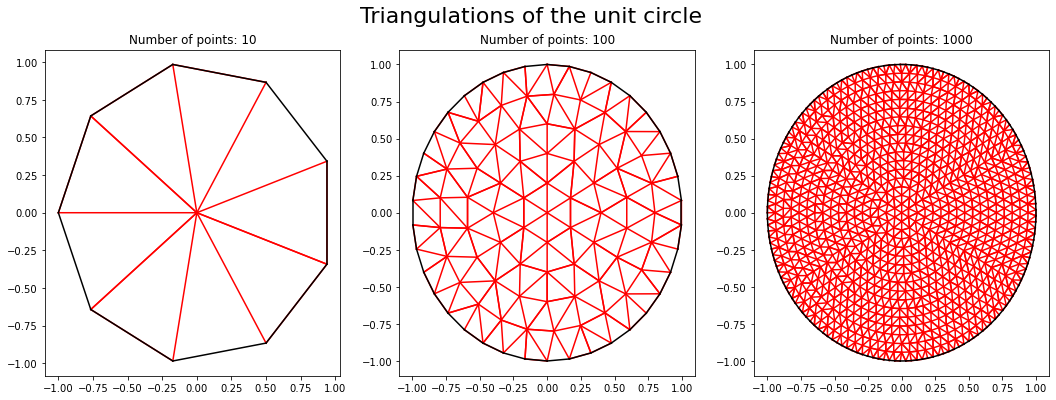

In [8]:
def plotMeshProper(N):
    """
    Takes in N, list of number of points and calls the given function GetDisc for each number of plots
    and plot them with the interior edges red and boundary edges as black.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Triangulations of the unit circle", size = 22)
    AX = [ax1, ax2, ax3]
    for n in range(len(N)):
        p, tri, edge = GetDisc(N[n])
        x = p[:, 0].flatten(); y = p[:, 1].flatten()
        AX[n].plot(x[tri.T], y[tri.T], color="red")
        AX[n].plot(x[edge.T], y[edge.T], color="black")
        AX[n].set_title(f"Number of points: {N[n]}")

plotMeshProper([10, 100, 1000])


## 2.5, 2.6 Stifness matrix & Right hand side

In [9]:
def coeffsH(k, alpha, p1, p2, p3):
    '''
        Calculates the coefficients c, c_x and c_y for local 
        basis function H_k^alpha
    '''
    A_c = np.column_stack([[1, 1, 1], [p1[0], p2[0], p3[0]], 
                           [p1[1], p2[1], p3[1]]]) # matrix to determine coeffs
    b = np.zeros(3)
    b[alpha] = 1
    coeffs = np.linalg.solve(A_c, b)
    return coeffs

def H(x, y, coeffs):
    '''
        Returns the local basis function based on coefficients calculated
        in the function coeffsH
    '''
    return coeffs[0] + coeffs[1]*x + coeffs[2]*y

def generateAandF(N, N_q = 4, f=f2):
    ''' 
    Input: 
        N: number of elements
        N_q: number of integration points in Gaussian quadrature
        f: RHS
        
        This function calculates the A matrix and the F vector
    '''
    p, tri, edge = GetDisc(N)
    A = np.zeros((N, N)) # Zero A
    F = np.zeros(N)      # Zero F
    
    # Assembly algorithm as described in the lectures for A and F
    for k in range(len(tri)): # for k = 1, ..., K
        p1, p2, p3 = p[tri[k][0]], p[tri[k][1]], p[tri[k][2]]
        for alpha in range(3): # for alpha = 1, 2, 3
            i = tri[k][alpha] # i = theta(k, alpha), local to global map
            
            #Creating F
            coeffs_alpha = coeffsH(k, alpha, p1, p2, p3)
            Halpha_x, Halpha_y = coeffs_alpha[1], coeffs_alpha[2]
            fH = lambda x, y: f(x, y)*H(x, y, coeffs_alpha)
            F[i] += quadrature2D(p1, p2, p3, N_q, fH)
            
            #Creating A with values from creating F and additional values
            for beta in range(3):
                j = tri[k][beta] # j = theta(k, beta) local to global map
                # Calculate (A^k)_{alpha, beta}
                # Find coefficients for H_alpha^k = C_a^k + C_{xa}^k*x + C_{ya}^k*y
                coeffs_beta = coeffsH(k, beta, p1, p2, p3)
                Hbeta_x, Hbeta_y = coeffs_beta[1], coeffs_beta[2]
                g = lambda x, y: Halpha_x*Hbeta_x + Halpha_y*Hbeta_y
                A[i, j] += quadrature2D(p1, p2, p3, N_q, g)
                    
    return A, F, p, tri, edge

N = 100
A, F, p, tri, edge = generateAandF(N)
print(np.linalg.det(A))

if np.linalg.cond(A) > 1/np.finfo(A.dtype).eps:
    print("The matrix A i singular")

-2.9784752713239384e+19
The matrix A i singular


Printing the determinant of the matrix a to check if it is singular. It looks like it is not singular, but this is because of the limitations of a machine. Therefore we do another check with the conditioning number of the matrix and using finfo from numpy which yields data on machine limits on floating points to verrify that it is singular.

## 2.7 Boundary conditions

In [10]:
def bigNumberApproach(N, N_q=4, f=f2, epsilon = 1e-16):
    """
    Using big number approach for homogeneous Dirichlet boundary conditions 
    """
    A, F, p, tri, edge = generateAandF(N, N_q, f)
    edgeNodes = np.unique(edge)
    A[edgeNodes, edgeNodes] = 1/epsilon
    F[edgeNodes] = 0
    
    return(np.linalg.solve(A, F), p, tri)

## 2.8 Verification

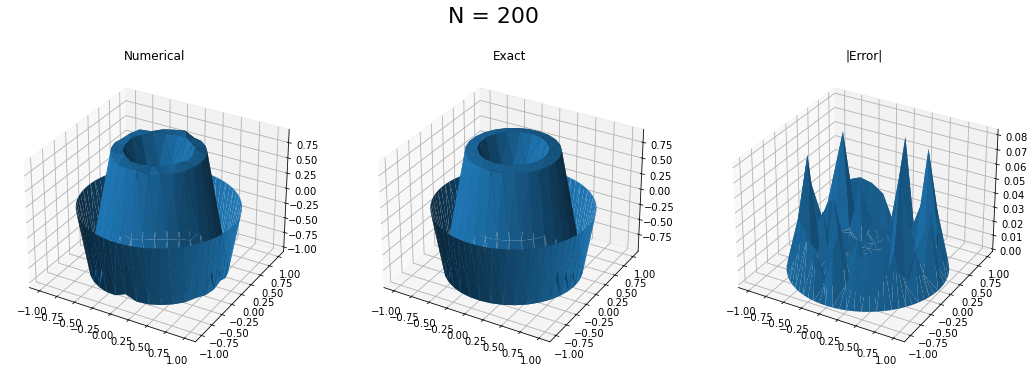

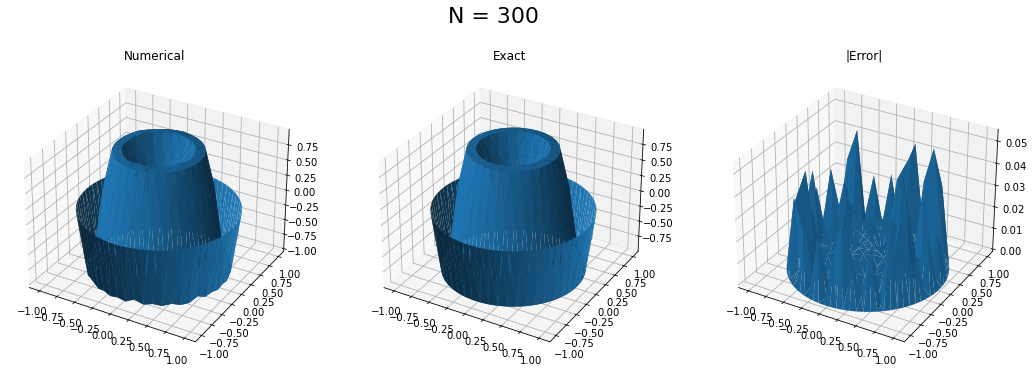

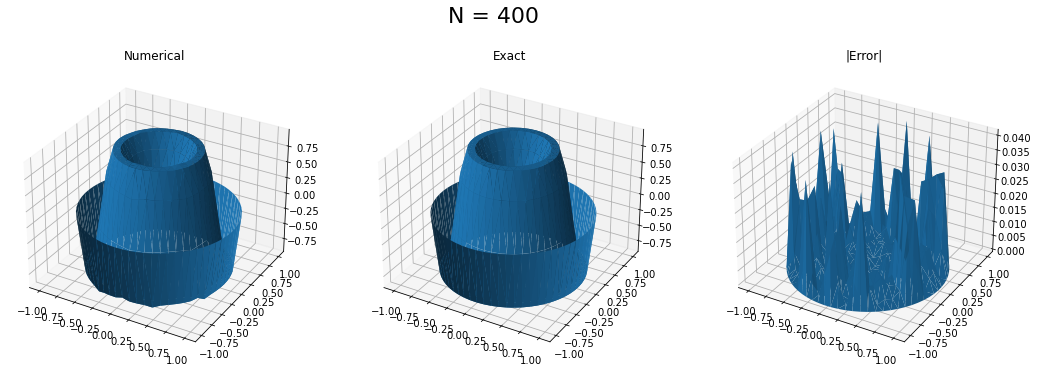

In [11]:
def plot3D(p, u, uex, N):
    """
    Takes in a list of (x, y) cordinates p, a numerical solution and an exact solution. Plots the
    numerical solution, exact solution and the error.
    """
    fig = plt.figure(figsize=(18, 6))
    fig.suptitle(f"N = {N}", size = 22)
    
    ax1 = fig.add_subplot(1, 3, 1, projection="3d")
    ax1.plot_trisurf(p[:, 0], p[:, 1], u, linewidth=0.2)
    ax1.set_title("Numerical")
    
    ax2 = fig.add_subplot(1, 3, 2, projection="3d")
    ax2.plot_trisurf(p[:, 0], p[:, 1], uex, linewidth=0.2)
    ax2.set_title("Exact")
    
    ax3 = fig.add_subplot(1, 3, 3, projection="3d")
    ax3.plot_trisurf(p[:, 0], p[:, 1], np.abs(u - uex), linewidth=0.2)
    ax3.set_title("|Error|")

u, p, tri = bigNumberApproach(200)
uex = uExact(p[:, 0], p[:, 1])
plot3D(p, u, uex, 200)

u, p, tri = bigNumberApproach(300)
uex = uExact(p[:, 0], p[:, 1])
plot3D(p, u, uex, 300)

u, p, tri = bigNumberApproach(400)
uex = uExact(p[:, 0], p[:, 1])
plot3D(p, u, uex, 400)

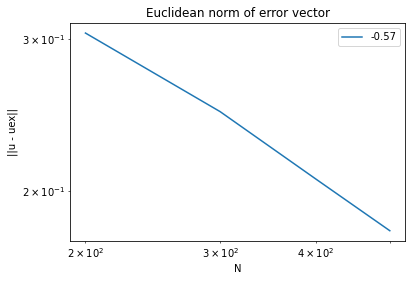

In [12]:
def errorTest(N):
    """
    Plotting the Euclidean norm of the error vector agianst the number of points in the mesh.
    """
    error = np.zeros(len(N))
    for n in range(len(N)):
        u, p, tri = bigNumberApproach(N[n])
        uex = uExact(p[:, 0], p[:, 1])
        error[n] = np.linalg.norm(uex - u)
    
    plt.loglog(N, error, label=round(np.polyfit(np.log(N), np.log(error), 1)[0], 2))
    plt.legend()
    
    plt.title("Euclidean norm of error vector")
    plt.ylabel("||u - uex||")
    plt.xlabel("N")
    
errorTest(np.array([200, 300, 400, 500]))

The task does not specify how we should compare the error. It only specifyes that we should compare how the quality of the approximation changes as the number of triangles in the mesh changes. Therfore we feel like this plot together with the 9 plots above satisfies this. We can clearly see a reduction in error with an increase of number of triangles.

## 3.3 Gauss quadrature

This change is implementet in quadrature1D and a test call to the example function is done belowe. Further the function with it's new application is used in 3.4 when we implement Neumann boundary conditions.

In [13]:
f1_1 = lambda x, y: np.exp(x)
a = np.array([1, 0])
b = np.array([2, 0])
nq1 = quadrature1D(a, b, 1, f1_1)
nq2 = quadrature1D(a, b, 2, f1_1)
nq3 = quadrature1D(a, b, 3, f1_1)
nq4 = quadrature1D(a, b, 4, f1_1)

ex_exact = np.exp(2)-np.exp(1)

dev1 = ex_exact - nq1
dev2 = ex_exact - nq2
dev3 = ex_exact - nq3
dev4 = ex_exact - nq4


print(tabulate([['1', nq1, dev1], ['2', nq2, dev2], ["3", nq3, dev3], ["4",nq4,dev4]], headers=['Nq', 'Value', 'Difference from exact'], tablefmt='orgtbl'))

|   Nq |   Value |   Difference from exact |
|------+---------+-------------------------|
|    1 | 2.71828 |             1.95249     |
|    2 | 4.66973 |             0.00104776  |
|    3 | 4.67077 |             2.2401e-06  |
|    4 | 4.67077 |             2.53607e-09 |


## 3.4 Implementation

In [14]:
g = lambda x, y: 4*np.pi*np.sqrt(x**2 + y**2)*np.cos(2*np.pi*(x**2 + y**2)) 

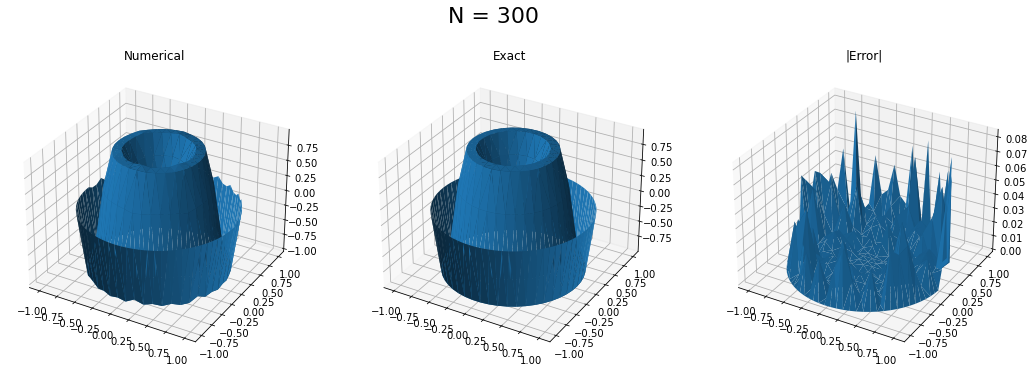

In [15]:
def neumannBoundary(N, N_q=4, f=f2, g=g, epsilon=1e-16):
    """
    Solving the problem with mixed boundary conditions.
    """
    A, F, p, tri, edge = generateAandF(N, N_q, f)
    edgeNodes = np.unique(edge)
    
    #Dirichlet b.c.
    dirichletNodes = edgeNodes[p[edgeNodes, 1] <= 0]
    A[dirichletNodes, dirichletNodes] = 1/epsilon
    F[dirichletNodes] = 0
    
    #Neumann b.c.
    neumannNodes = edgeNodes[p[edgeNodes, 1] > 0]
    for node in neumannNodes:
        for element in tri[np.any(tri == node, axis=1)]:
            #Calculating the coefficients again is strictly not necessary, but makes the implementation
            #easier and increases the understanding of which values are used when calculating the Neumann
            #bouandary condition. And since the O() notation stays the same we accept this decrease in speed
            coeff = coeffsH(1, np.argwhere(element == node), p[element[0]], p[element[1]], p[element[2]])
            Hf = lambda x, y: H(x, y, coeff) * g(x, y)
            
            neumannEdgePoint = [e for e in element if e in edgeNodes and e != node]
            
            if(neumannEdgePoint):
                #Finding the points that are on the edge and calculating both the relevant integrals for
                #these points.
                neumannEdgePoint = neumannEdgePoint[0]
            
                neumannEdge = edge[np.any(edge == node, axis = 1)]
                neumannEdge = neumannEdge[np.any(neumannEdge == neumannEdgePoint, axis = 1)][0]
                                
                if np.argwhere(neumannEdge == node):
                    F[node] += quadrature1D(p[node], p[neumannEdgePoint], N_q, Hf)
                else:
                    F[node] += quadrature1D(p[neumannEdgePoint], p[node], N_q, Hf)
    
    u = np.linalg.solve(A, F)
    return(u, p)

u, p = neumannBoundary(300)
uex = uExact(p[:, 0], p[:, 1])
plot3D(p, u, uex, 300)


In retrospective of the last task the naming of variables could have been a bit better, aswell as we could have avoided calculating some of the coefficients more than one time. Further the plot of the final task is done with a bith fewer points to really show the Neumann boundary condition as this gets less visable with more triangles.